In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


trainn = pd.read_csv("./phishing.csv")
# 11054 rows and 32 columns


Matplotlib is building the font cache; this may take a moment.


In [4]:
print(trainn.shape)

(11054, 32)


In [5]:
missing  = pd.concat([trainn.isnull().sum()],axis = 1 , keys=['Train'])

# New Section

In [6]:
print(trainn.head())

   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic

In [7]:
alldata = trainn.drop(["class","Index"],axis =1)

In [8]:
trainn.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [9]:
alldata.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport'],
      dtype='object')

In [10]:
trainn.head

<bound method NDFrame.head of        Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  \
0          0        1        1         1        1              1   
1          1        1        0         1        1              1   
2          2        1        0         1        1              1   
3          3        1        0        -1        1              1   
4          4       -1        0        -1        1             -1   
...      ...      ...      ...       ...      ...            ...   
11049  11049        1       -1         1       -1              1   
11050  11050       -1        1         1       -1             -1   
11051  11051        1       -1         1        1              1   
11052  11052       -1       -1         1        1              1   
11053  11053       -1       -1         1        1              1   

       PrefixSuffix-  SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  \
0                 -1           0      1            -1  ...               

In [11]:
for col in trainn.dtypes[trainn.dtypes == "object"].index:
  for_dummy = trainn.pop(col)
  trainn = pd.concat([trainn, pd.get_dummies(for_dummy,prefix=col)],axis=1)
  trainn.head()

In [12]:
labels = trainn.pop("class")


In [13]:
labels.head

<bound method NDFrame.head of 0       -1
1       -1
2       -1
3        1
4        1
        ..
11049    1
11050   -1
11051   -1
11052   -1
11053   -1
Name: class, Length: 11054, dtype: int64>

In [14]:
labels.shape

(11054,)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(trainn, labels,test_size = 0.30)
print(x_test.shape)


(3317, 31)


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [35]:
#y_pred = rf.predict(x_test)
example =np.array([[1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1]]) 

outputt= rf.predict(example)
# y_pred = rf.predict(x_test)
print(example)
print(outputt)

[[ 1  1  0  1  1  1 -1 -1 -1 -1  1  1 -1  1  0 -1 -1 -1 -1  0  1  1  1  1
   1 -1  1 -1  1  0 -1]]
[-1]


c:\Users\ullas.krishna\Music\mc_pc\temp\flask\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
from flask import Flask, render_template,request
app = Flask(__name__)
print(__name__)
@app.route('/', methods=['POST'])
def predict():
  value = request.form['fname']
  return render_template('response.html',value=outputt)




__main__


In [31]:
from sklearn.metrics import roc_curve , auc
false_positive_rate , true_positive_rate, thresholds = roc_curve(y_test,y_pred)# compare between results and actual
roc_auc = auc(false_positive_rate , true_positive_rate)
roc_auc

0.9693506345704123

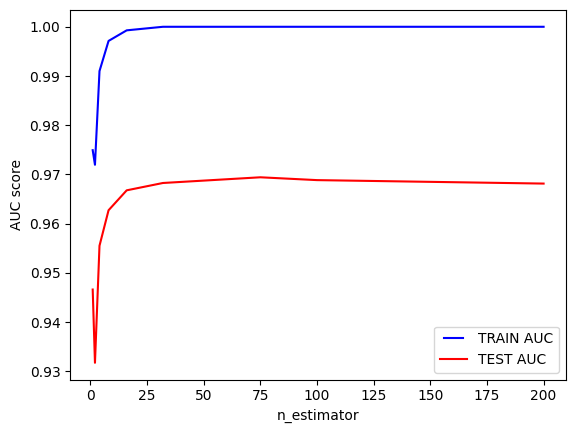

In [21]:
estim = [1,2,4,8,16,32,75,100,200,]

train_res = []
test_res = []
for estimator in estim:
  rf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
  rf.fit(x_train,y_train)
  train_pred = rf.predict(x_train)
  false_positive_rate , true_positive_rate, thresholds = roc_curve(y_train,train_pred)
  roc_auc = auc(false_positive_rate,true_positive_rate)
  train_res.append(roc_auc)
  y_pred = rf.predict(x_test)
  false_positive_rate , true_positive_rate, thresholds = roc_curve(y_test,y_pred)
  roc_auc = auc(false_positive_rate,true_positive_rate)
  test_res.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estim, train_res,"b",label="TRAIN AUC")
line2, = plt.plot(estim, test_res,"r",label="TEST AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimator")

plt.show()


In [ ]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)